# Import

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder
sns.set() 
loadingPath = "../CSGO-dataset"

# Visualisation globale des données

## Chargement des données

In [5]:
currentFile = open(loadingPath+"/players.csv")
players_df = pd.read_csv(currentFile)

## Noms des différentes colonnes

In [6]:
players_df.head(0)

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,...,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t


## Contenance des 5 premières lignes

In [7]:
rows = 5
players_df.head(rows)

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,...,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,...,-1.0,72.5,80.0,0.93,7.0,9.0,-2.0,70.4,63.6,0.89
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,...,3.0,79.5,53.3,1.12,4.0,8.0,-4.0,40.7,54.5,0.53
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,...,1.0,81.5,63.6,1.03,9.0,9.0,0.0,87.9,73.3,1.05
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,...,0.0,67.2,66.7,0.97,1.0,9.0,-8.0,14.8,45.5,0.31
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,...,-1.0,72.9,81.8,0.96,8.0,7.0,1.0,56.3,80.0,0.99


## Répartition des données (moyenne,min,max,25%...)

In [8]:
players_df.describe()

,player_id,match_id,event_id,best_of,kills,assists,deaths,hs,flash_assists,kast,...,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
count,383317.000000,3.833170e+05,383317.000000,383317.000000,383317.000000,383317.000000,383317.000000,383317.000000,273525.000000,366471.000000,...,46163.000000,46163.000000,46016.000000,46163.000000,46152.000000,46152.000000,46152.000000,46152.000000,46022.000000,46152.000000
mean,9588.645335,2.319274e+06,3434.342982,2.011815,29.955744,6.973153,29.997209,13.517600,1.642790,69.238681,...,0.962936,78.105608,72.087948,1.062747,8.419375,9.416710,-0.997335,71.066318,67.165277,1.059163
std,4304.463632,1.184550e+04,903.501732,1.017813,16.458563,4.694053,15.432389,8.357248,1.983596,11.029316,...,4.963258,25.945805,15.850078,0.446695,4.209946,3.520635,4.900816,26.269345,16.526397,0.476779
min,2.000000,2.297880e+06,820.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.600000,...,-14.000000,0.000000,8.300000,0.000000,0.000000,0.000000,-19.000000,0.000000,6.700000,0.000000
25%,7805.000000,2.309045e+06,2674.000000,1.000000,17.000000,3.000000,18.000000,7.000000,0.000000,62.700000,...,-3.000000,60.500000,61.100000,0.750000,5.000000,7.000000,-4.000000,53.100000,55.600000,0.730000
50%,9353.000000,2.319201e+06,3389.000000,2.000000,26.000000,6.000000,25.000000,12.000000,1.000000,69.800000,...,1.000000,76.300000,73.300000,1.030000,8.000000,10.000000,-1.000000,68.900000,66.700000,1.020000
75%,12254.000000,2.329556e+06,4189.000000,3.000000,41.000000,10.000000,40.000000,18.000000,2.000000,76.500000,...,4.000000,93.600000,83.300000,1.330000,11.000000,12.000000,2.000000,86.400000,80.000000,1.330000
max,20011.000000,2.339828e+06,5233.000000,5.000000,148.000000,40.000000,129.000000,79.000000,23.000000,100.000000,...,27.000000,270.500000,100.000000,4.850000,32.000000,27.000000,21.000000,378.000000,100.000000,6.470000


## Informations relatives aux types des colonnes

In [9]:
players_df.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383317 entries, 0 to 383316
Data columns (total 101 columns):
 #    Column            Dtype  
---   ------            -----  
 0    date              object 
 1    player_name       object 
 2    team              object 
 3    opponent          object 
 4    country           object 
 5    player_id         int64  
 6    match_id          int64  
 7    event_id          int64  
 8    event_name        object 
 9    best_of           int64  
 10   map_1             object 
 11   map_2             object 
 12   map_3             object 
 13   kills             int64  
 14   assists           int64  
 15   deaths            int64  
 16   hs                int64  
 17   flash_assists     float64
 18   kast              float64
 19   kddiff            int64  
 20   adr               float64
 21   fkdiff            int64  
 22   rating            float64
 23   m1_kills          int64  
 24   m1_assists        int64  
 25   m1_deaths         

## Sélection des types numériques 

In [10]:
numeric = players_df.select_dtypes(include=['int64','float64'])
numeric

,player_id,match_id,event_id,best_of,kills,assists,deaths,hs,flash_assists,kast,...,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
0,9136,2339385,4901,3,57,14,61,29,0.0,71.1,...,-1.0,72.5,80.0,0.93,7.0,9.0,-2.0,70.4,63.6,0.89
1,11219,2339385,4901,3,54,10,54,18,4.0,65.1,...,3.0,79.5,53.3,1.12,4.0,8.0,-4.0,40.7,54.5,0.53
2,8738,2339385,4901,3,55,10,51,28,1.0,67.5,...,1.0,81.5,63.6,1.03,9.0,9.0,0.0,87.9,73.3,1.05
3,10671,2339385,4901,3,43,5,54,18,2.0,65.1,...,0.0,67.2,66.7,0.97,1.0,9.0,-8.0,14.8,45.5,0.31
4,8520,2339385,4901,3,52,22,46,23,9.0,77.1,...,-1.0,72.9,81.8,0.96,8.0,7.0,1.0,56.3,80.0,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383312,7607,2298497,1957,2,30,2,17,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383313,9752,2298497,1957,2,26,6,22,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383314,7698,2298497,1957,2,28,4,34,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383315,9753,2298497,1957,2,18,7,36,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Représentation des données numériques sous forme de gradient et highlighting 

In [11]:
numeric.head(rows).style.background_gradient(axis=0).highlight_max(color='crimson').highlight_min(color='navajowhite')

ImportError: Pandas requires version '2.11' or newer of 'jinja2' (version '2.10.1' currently installed).

## Sélection des types catégoriques

In [12]:
players_df.select_dtypes(exclude=['int64','float64'])

,date,player_name,team,opponent,country,event_name,map_1,map_2,map_3
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,IEM Katowice 2020,Overpass,Nuke,Inferno
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,IEM Katowice 2020,Overpass,Nuke,Inferno
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,IEM Katowice 2020,Overpass,Nuke,Inferno
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,IEM Katowice 2020,Overpass,Nuke,Inferno
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,IEM Katowice 2020,Overpass,Nuke,Inferno
...,...,...,...,...,...,...,...,...,...
383312,2015-10-07,kIMERA,ExAequo,RIP Fonty,Italy,Milan Games Week 2015 League by FACEIT,Cobblestone,Cache,NaN
383313,2015-10-07,morphiw0w,ExAequo,RIP Fonty,Italy,Milan Games Week 2015 League by FACEIT,Cobblestone,Cache,NaN
383314,2015-10-07,overfly,RIP Fonty,ExAequo,Italy,Milan Games Week 2015 League by FACEIT,Cobblestone,Cache,NaN
383315,2015-10-07,simozor,RIP Fonty,ExAequo,Italy,Milan Games Week 2015 League by FACEIT,Cobblestone,Cache,NaN


## Encodage des données catégoriques de la colonne "player_name"

In [13]:
ord_enc = OrdinalEncoder()
players_df['player_name_code'] = ord_enc.fit_transform(players_df[['player_name']])
players_df[['player_name','player_name_code']].head(11)

,player_name,player_name_code
0,Brehze,759.0
1,CeRq,918.0
2,EliGE,1525.0
3,Ethan,1583.0
4,NAF,3816.0
5,Stewie2K,5375.0
6,Twistzz,5748.0
7,nitr0,9725.0
8,stanislaw,10987.0
9,tarik,11163.0


# Python function

In [14]:
def convert_series_to_dataframe(series,names):
    df = series.to_frame().reset_index()
    df.columns = [names]
    return df

In [15]:
def count_col(name_col,dataframe,name1='a',name2='b'):
    series = dataframe[name_col].value_counts(dropna=True)
    df = convert_series_to_dataframe(series,[name1,name2])
    return df

In [16]:
def df_to_list(df):
    df_list = []
    for i in list(df): 
        df_list.append(df[i].tolist())
    return df_list

In [17]:
def concat(list_df):
    concat_list = []
    for i in range(len(list_df)):
        concat_list = concat_list + list_df[i]
    return concat_list

In [18]:
def histogramme(x,y,nb_print,xlabel,ylabel,title,ylim,colors=['crimson'],fig_size=(15,5),barWidth=0.8,grid=True):
    plt.rcParams["figure.figsize"] = fig_size
    plt.ylim(ylim)
    plt.bar(x,y,color = colors)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid = grid 
    plt.show()

In [19]:
def get_rows_year(annee,df):
    debut = f"{annee}-01-01"
    fin = f"{annee}-12-31"
    tmp_df = df.loc[(df['date'] > debut) & (df['date'] < fin)]
    return tmp_df

In [20]:
def add_cond(list_cond,col_name,df):
    res = pd.DataFrame(columns = df.columns.tolist())
    for i in range(len(list_cond)):
         res = res.append(df.loc[(df[col_name] == list_cond[i])])
    return res

# Nombre de matchs joués par les joueurs

## Représentation des joueurs ayant le plus joués entre 2016 et 2020 

In [21]:
count_players_games = count_col('player_name',players_df,'player_name','nb_matches').head(10)
count_players_games

,player_name,nb_matches
0,ALEX,887
1,steel,809
2,Furlan,752
3,rain,733
4,HUNDEN,726
5,Stewie2K,716
6,FalleN,707
7,tarik,696
8,karrigan,693
9,fer,692


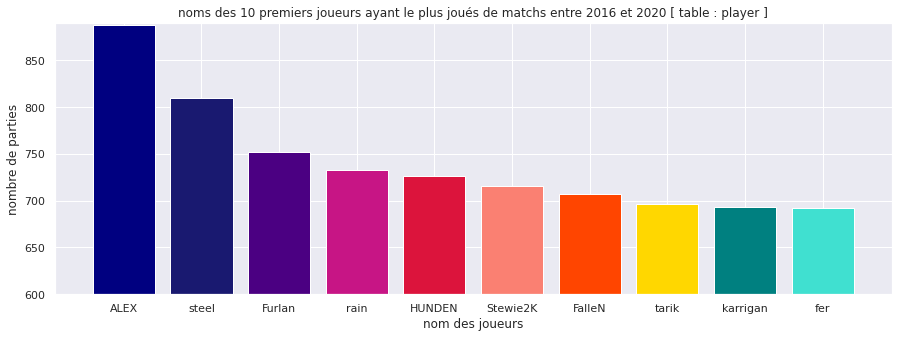

In [22]:
nb_joueur = 10
players = count_players_games.iloc[0:nb_joueur,0]
nb_matches = count_players_games.iloc[0:nb_joueur,1]
xlabel = 'nom des joueurs'
ylabel = 'nombre de parties'
title = 'noms des' + f' {nb_joueur} ' + 'premiers joueurs ayant le plus joués de matchs entre 2016 et 2020 [ table : player ]'
ylim = [600,890]
colors = ['navy','midnightblue','indigo','mediumvioletred','crimson','salmon','orangered','gold','teal','turquoise']
histogramme(players,nb_matches,nb_joueur,xlabel,ylabel,title,ylim,colors)

## Représentation des joueurs Français ayant le plus joués entre 2016 et 2020

/tmp/ipykernel_4494/263184169.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(df.loc[(df[col_name] == list_cond[i])])


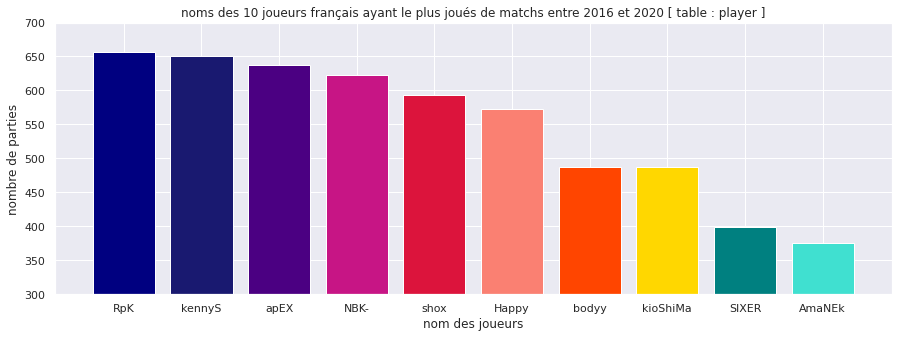

In [23]:
french_df = add_cond(['France'],'country',players_df)
count_players_french = count_col('player_name',french_df,'player_name','nb_matches')
nb_joueur = 10
players = count_players_french.iloc[0:nb_joueur,0]
nb_matches = count_players_french.iloc[0:nb_joueur,1]
xlabel = 'nom des joueurs'
ylabel = 'nombre de parties'
title = 'noms des' + f' {nb_joueur} ' + 'joueurs français ayant le plus joués de matchs entre 2016 et 2020 [ table : player ]'
ylim = [300,700]
colors = ['navy','midnightblue','indigo','mediumvioletred','crimson','salmon','orangered','gold','teal','turquoise']
histogramme(players,nb_matches,nb_joueur,xlabel,ylabel,title,ylim,colors)

## Représentation du nombre de matchs joués par les 10 joueurs précédents seulement en 2020

/tmp/ipykernel_4494/263184169.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(df.loc[(df[col_name] == list_cond[i])])
/tmp/ipykernel_4494/263184169.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(df.loc[(df[col_name] == list_cond[i])])
/tmp/ipykernel_4494/263184169.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(df.loc[(df[col_name] == list_cond[i])])
/tmp/ipykernel_4494/263184169.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(df.loc[(df[col_name] == list_cond[i])])
/tmp/ipykernel_4494/263184169.py:4: FutureWarning: The frame.append method is deprecated

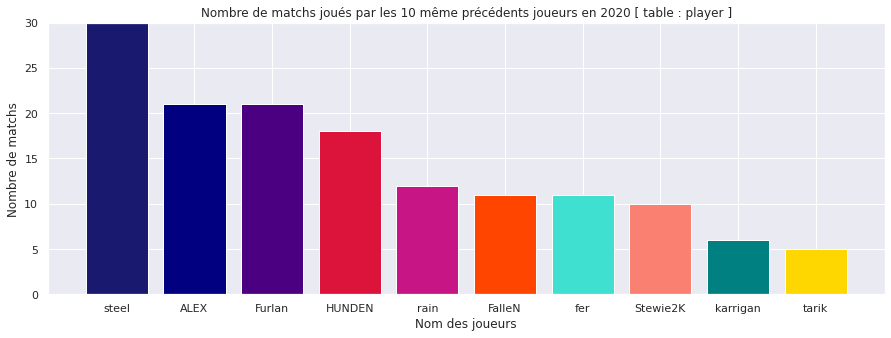

In [24]:
years = 2020
player_name_list = list((count_players_games['player_name']).to_numpy().flatten())
rows_2020 = get_rows_year(years,players_df)
#manually
rows_2020.loc[(rows_2020['player_name'] == 'ALEX') + (rows_2020['player_name'] == 'steel') ]
#function
same_10_players_2020 = add_cond(player_name_list,'player_name',rows_2020)
same_10_players_2020_count = count_col('player_name',same_10_players_2020,f'players_names_{years}',f'matches_{years}')

nb_joueurs = len(player_name_list)
players = same_10_players_2020_count.iloc[0:nb_joueur,0]
nb_matches = same_10_players_2020_count.iloc[0:nb_joueur,1]
xlabel = 'Nom des joueurs'
ylabel = 'Nombre de matchs'
title = 'Nombre de matchs joués par les ' + f'{nb_joueur}' + ' même précédents joueurs en ' + f'{years}' + ' [ table : player ]'
ylim = [0,30]
colors = ['midnightblue','navy','indigo','crimson','mediumvioletred','orangered','turquoise','salmon','teal','gold']
histogramme(players,nb_matches,nb_joueur,xlabel,ylabel,title,ylim,colors)

## Représentation des joueurs ayant joués le plus de matchs en 2020

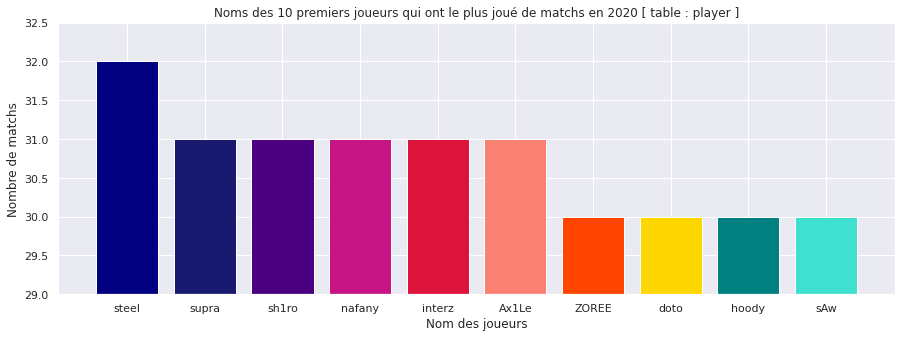

In [25]:
years = 2020
rows_2020 = get_rows_year(years,players_df)
count_players_games_2020 = count_col('player_name',rows_2020,'player_name','nb_matchs')

nb_joueur = 10
players = count_players_games_2020.iloc[0:nb_joueur,0]
nb_matches = count_players_games_2020.iloc[0:nb_joueur,1]
xlabel = 'Nom des joueurs'
ylabel = 'Nombre de matchs'
title = 'Noms des ' + f'{nb_joueur}' + ' premiers joueurs qui ont le plus joué de matchs en ' + f'{years}' + ' [ table : player ]'
ylim = [29,32.5]
colors = ['navy','midnightblue','indigo','mediumvioletred','crimson','salmon','orangered','gold','teal','turquoise']
histogramme(players,nb_matches,nb_joueur,xlabel,ylabel,title,ylim,colors)

In [26]:
#on peut append des dataframes, waw 
res = pd.DataFrame(columns = players_df.columns.tolist())
res_bis = res.append(rows_2020.loc[(rows_2020['player_name'] == 'ALEX')])

/tmp/ipykernel_4494/1400981472.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_bis = res.append(rows_2020.loc[(rows_2020['player_name'] == 'ALEX')])


## Représentation des pays par championnats et par année 

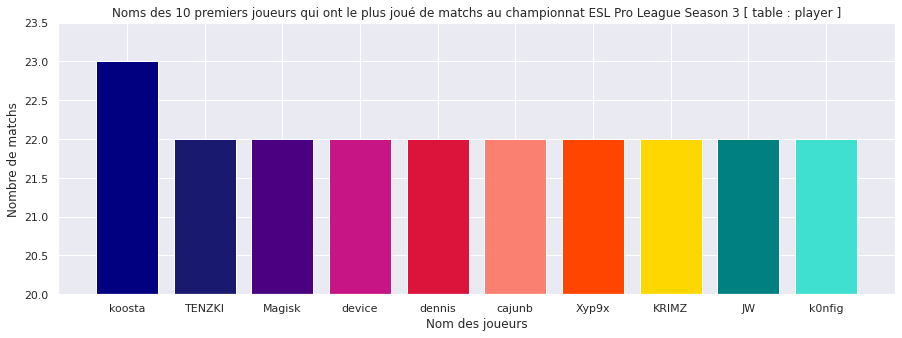

In [27]:
championnat = 'ESL Pro League Season 3'
ESL_df = players_df[(players_df['event_name'] == championnat )]
nb_game_players = count_col('player_name',ESL_df,'player_name','nb_matchs')

nb_joueur = 10
players = nb_game_players.iloc[0:nb_joueur,0]
nb_matches = nb_game_players.iloc[0:nb_joueur,1]
xlabel = 'Nom des joueurs'
ylabel = 'Nombre de matchs'
title = 'Noms des ' + f'{nb_joueur}' + ' premiers joueurs qui ont le plus joué de matchs au championnat ' + f'{championnat}' + ' [ table : player ]'
ylim = [20,23.5]
colors = ['navy','midnightblue','indigo','mediumvioletred','crimson','salmon','orangered','gold','teal','turquoise']
histogramme(players,nb_matches,nb_joueur,xlabel,ylabel,title,ylim,colors)

In [28]:
championnat = 'ESL Pro League Season 3'
ESL_df = players_df[(players_df['event_name'] == championnat )]
list_match_id = list(ESL_df['match_id'].drop_duplicates().to_numpy().flatten())
df_one = add_cond([list_match_id[0]],'match_id',ESL_df)
nom_12 = df_one[['team','opponent']].head(1)
teams = pd.DataFrame(columns = ['teams','player_1','player_2','player_3','player_4','player_4'])
mc1 = nom_12['team'].to_string()
mc2 = nom_12['opponent']
list_players_mc1 = []
list_players_mc2 = []

/tmp/ipykernel_4494/263184169.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(df.loc[(df[col_name] == list_cond[i])])


In [29]:
for i in range(len(nom_12)):
    if df_one.iloc[i,2] == mc1[7]:
        list_players_mc1.append(nom_12.iloc[i,1])
    else:
        list_players_mc2.append(nom_12.iloc[i,1])

        
      
        print(mc1)
        type(mc1)

350519    NRG


/tmp/ipykernel_4494/263184169.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(df.loc[(df[col_name] == list_cond[i])])
/tmp/ipykernel_4494/263184169.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(df.loc[(df[col_name] == list_cond[i])])
/tmp/ipykernel_4494/263184169.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(df.loc[(df[col_name] == list_cond[i])])
/tmp/ipykernel_4494/263184169.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(df.loc[(df[col_name] == list_cond[i])])
/tmp/ipykernel_4494/263184169.py:4: FutureWarning: The frame.append method is deprecated

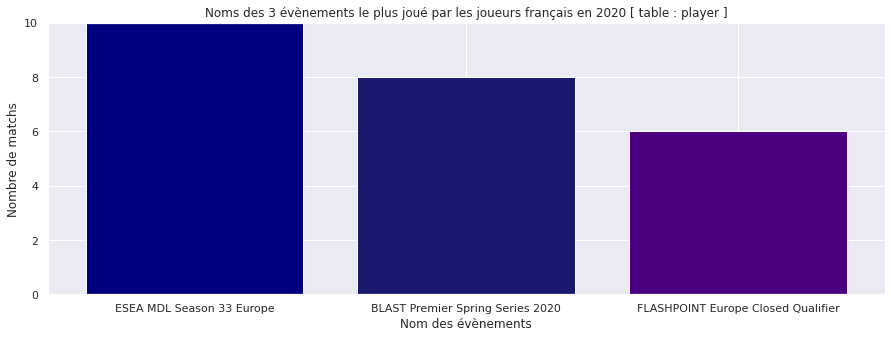

,a,b
0,ESEA MDL Season 33 Europe,10
1,BLAST Premier Spring Series 2020,8
2,FLASHPOINT Europe Closed Qualifier,6
3,IEM Katowice 2020,5
4,Supreme Masters European Invitational 2020,5
5,ASUS ROG Winter 2020,4
6,Europe Minor Open Qualifier 1 - ESL One Rio 2020,4
7,ICE Challenge 2020,3
8,OGA Counter PIT Season 7,3
9,IEM Katowice 2020 Europe Closed Qualifier,2


In [30]:
count_col('team',rows_2020[(rows_2020['country'] == 'France')])
event_name_french_2020 = count_col('event_name',rows_2020[(rows_2020['country'] == 'France')],'name_events','nb_apparition')
list_event_name = list((event_name_french_2020['name_events']).to_numpy().flatten())
df = add_cond(list_event_name,'event_name',rows_2020[((rows_2020['country'] == 'France'))])                                                
participation_french_event = count_col('event_name',df.drop_duplicates(['match_id']))

nb_events = 3
players = participation_french_event.iloc[0:nb_events,0]
nb_matches = participation_french_event.iloc[0:nb_events,1]
xlabel = 'Nom des évènements'
ylabel = 'Nombre de matchs'
title = 'Noms des ' + f'{nb_events}' + ' évènements le plus joué par les joueurs français en ' + f'{years}' + ' [ table : player ]'
ylim = [0,10]
colors = ['navy','midnightblue','indigo','mediumvioletred','crimson','salmon','orangered','gold','teal','turquoise']
histogramme(players,nb_matches,nb_events,xlabel,ylabel,title,ylim,colors)
participation_french_event

In [31]:
rows_2020[((rows_2020['country'] == 'France') & (rows_2020['event_name'] == 'ESEA MDL Season 33 Europe'))]['team'].drop_duplicates()
rows_2020[((rows_2020['country'] == 'France') & (rows_2020['event_name'] == 'BLAST Premier Spring Series 2020'))]['team'].drop_duplicates()

1991          G2
1994          OG
4152    Vitality
Name: team, dtype: object

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (13,).

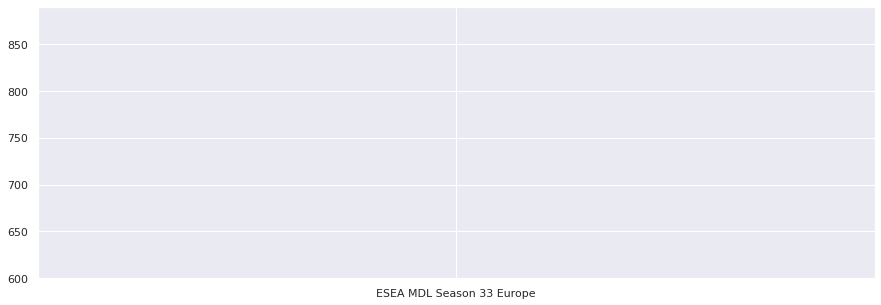

In [32]:
players_diff = players_df[(players_df['country'] == 'France')] #France
rows_2020 = get_rows_year(2020,players_diff) #2020
event_participation_french_df = count_col('event_name',rows_2020,'event_name','nb_french_matchs')

nb_events = 13
event_names = event_participation_french_df.iloc[0:nb_events,0]
nb_matches = event_participation_french_df.iloc[0:nb_events,1]
xlabel = 'nom des évènements'
ylabel = 'nombre de matchs français'
title = 'noms des' + f' {nb_joueur} ' + 'premiers joueurs ayant le plus joués de matchs entre 2016 et 2020 [ table : player ]'
ylim = [600,890]
colors = ['navy','midnightblue','indigo','mediumvioletred','crimson','salmon','orangered','gold','teal','turquoise']
histogramme(players,nb_matches,nb_joueur,xlabel,ylabel,title,ylim,colors)

In [33]:


country_df = 
players = country_df.iloc[0:nb_country,0]
nb_matches = country_df.iloc[0:nb_country,1]

plt.rcParams["figure.figsize"] = (15, 5)
plt.bar(players,nb_matches, color = ['navy','midnightblue','indigo','mediumvioletred',
'crimson','salmon','orangered','gold','teal','turquoise'])
plt.xlabel('Noms des pays')
plt.ylabel('Nombre de joueurs')
plt.title('Noms des ' + f'{nb_country}' + ' premiers pays qui ont le plus joueurs compétitifs entre 2016 et 2020' + 
          ' [ table : player ]', style='italic')
plt.grid = True
plt.show()

SyntaxError: invalid syntax (560796877.py, line 1)

In [34]:
country_years = getNbMatchaYear(years,players_df).drop_duplicates(['player_name'])
country_df_years = count_col('country',country_years,'country_2020','nb_players').head(13)
country_df_years

NameError: name 'getNbMatchaYear' is not defined

In [35]:
barWidth = 0.8
nb_country = 13
players = country_df_years.iloc[0:nb_country,0]
nb_matches = country_df_years.iloc[0:nb_country,1]

df = players_df.drop_duplicates(['player_name'])
country_df = count_col('country',df,'country','nb_matchs')
country_df

plt.rcParams["figure.figsize"] = (15, 5)
plt.bar(players,nb_matches, color = ['navy','midnightblue','indigo','mediumvioletred',
'crimson','salmon','orangered','gold','teal','turquoise'])
plt.xlabel('Nom des pays')
plt.ylabel('Nombre de joueurs')
plt.title('Noms des ' + f'{nb_country}' + ' premiers pays qui ont le plus joueurs compétitifs en ' + f'{years}' + 
          ' [ table : player ]', style='italic')
plt.grid = True
plt.show()

NameError: name 'country_df_years' is not defined

In [36]:
players_df['event_name'].drop_duplicates()

0                                IEM Katowice 2020
60                ESEA MDL Season 33 North America
110             Aorus League 2020 #1 Southern Cone
160                      ESEA MDL Season 33 Europe
220                   ESEA MDL Season 33 Australia
                            ...                   
382479                 D!ngIT $2000 Weekly Cup #21
382728                    World Championships 2015
382798                            League of Sharks
382848                         QuickShot Arena #10
383077    LVP Season 9 División de Honor Sprint #1
Name: event_name, Length: 3158, dtype: object

In [37]:
years = 2020
players = players_df.drop_duplicates(['player_name'])
matchs = getNbMatchaYear(years,players_df)

NameError: name 'getNbMatchaYear' is not defined

In [38]:
c = count_col('event_name',matchs,'events_name','nb_apparition').head(10)
c

NameError: name 'matchs' is not defined

In [ ]:
def search_param(col,param,df):
    return df.loc[(df[col] == param)]

In [ ]:
d1 = search_param('event_name','ESEA MDL Season 33 Australia',players_df)
d2 = getNbMatchaYear(2020,d1)
d3 = d2.drop_duplicates(['team'])
d3['team']

In [ ]:
t = players_df.head(5)
t

In [43]:
teams_df = players_df[['team','opponent']]
list_teams = concat(df_to_list(teams_df))
teams_df = pd.DataFrame(list_teams, columns =['names_teams'])


In [ ]:
teams = count_col('names_teams',teams_df,'name_teams','number_of_matchs')
teams.head(10)

In [ ]:
barWidth = 0.8
nb_team = 13
players = country_df_years.iloc[0:nb_team,0]
nb_matches = country_df_years.iloc[0:nb_team,1]

plt.rcParams["figure.figsize"] = (15, 5)
plt.bar(players,nb_matches, color = ['navy','midnightblue','indigo','mediumvioletred',
'crimson','salmon','orangered','gold','teal','turquoise'])
plt.xlabel('Nom des teams')
plt.ylabel('Nombre de matchs joués')
plt.title('Noms des ' + f'{nb_country}' + ' premiers pays qui ont le plus joueurs compétitifs en ' + f'{years}' + 
          ' [ table : player ]', style='italic')
plt.grid = True-
plt.show()

In [ ]:
players_df.drop_duplicates(['match_id'])

In [ ]:
"""
Regarder dans quelle team un joueur à jouer 
Regarder dans quels championnats il a participé 
Regarder les amp
"""